# Predicting Cancer using Diagnostic Wisconsin Breast Cancer Database

## Import libraris




In [2285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import roc_auc_score

# Do ploting inline instead of in a separate window
%matplotlib inline

## Loading and Reviewing data

In [2286]:
# Load Wisconsin Breast Cancer Database 
df = pd.read_csv("cancer_2.csv")

In [2287]:
# (Number of rows, number of columns)
df.shape

(699, 11)

In [2288]:
# Information of the datasets (columns, datatypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [2289]:
# Inspect the 10 first rows of the newly loaded data
df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [2290]:
# Inspect the 10 LAST rows of the data
df.tail(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
689,654546,1,1,1,1,2,1,1,1,8,2
690,654546,1,1,1,3,2,1,1,1,1,2
691,695091,5,10,10,5,4,5,4,4,1,4
692,714039,3,1,1,1,2,1,1,1,1,2
693,763235,3,1,1,1,2,1,2,1,2,2
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [2291]:
# Statistical information for the dataset
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Data cleaning

### Remove non existent values

In [2292]:
df.isnull().values.any()

False

The ? value is not recognized as null value (df.isnull().values.any() returns false) so we have to change those with NaN

In [2293]:
df = df.replace('?',np.NaN)

In [2294]:
# Now we can see the number of non-null values in Bare Nuclei column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [2295]:
# Now the isnull function works
df.isnull().values.any()

True

In [2296]:
df = df.dropna()

In [2297]:
df.shape

(683, 11)

In [2298]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


### Remove unnecessary columns and duplicates

In [2299]:
# we remove the sample code number column since it's not needed

del df['Sample code number']

In [2300]:
df.shape

(683, 10)

In [2301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              683 non-null    int64 
 1   Uniformity of Cell Size      683 non-null    int64 
 2   Uniformity of Cell Shape     683 non-null    int64 
 3   Marginal Adhesion            683 non-null    int64 
 4   Single Epithelial Cell Size  683 non-null    int64 
 5   Bare Nuclei                  683 non-null    object
 6   Bland Chromatin              683 non-null    int64 
 7   Normal Nucleoli              683 non-null    int64 
 8   Mitoses                      683 non-null    int64 
 9   Class                        683 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


In [2302]:
df = df.drop_duplicates()

In [2303]:
df.shape

(449, 10)

In [2304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              449 non-null    int64 
 1   Uniformity of Cell Size      449 non-null    int64 
 2   Uniformity of Cell Shape     449 non-null    int64 
 3   Marginal Adhesion            449 non-null    int64 
 4   Single Epithelial Cell Size  449 non-null    int64 
 5   Bare Nuclei                  449 non-null    object
 6   Bland Chromatin              449 non-null    int64 
 7   Normal Nucleoli              449 non-null    int64 
 8   Mitoses                      449 non-null    int64 
 9   Class                        449 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 38.6+ KB


### Function plots a graph correlation matrix for each pair of colums in the dataframe

In [2305]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

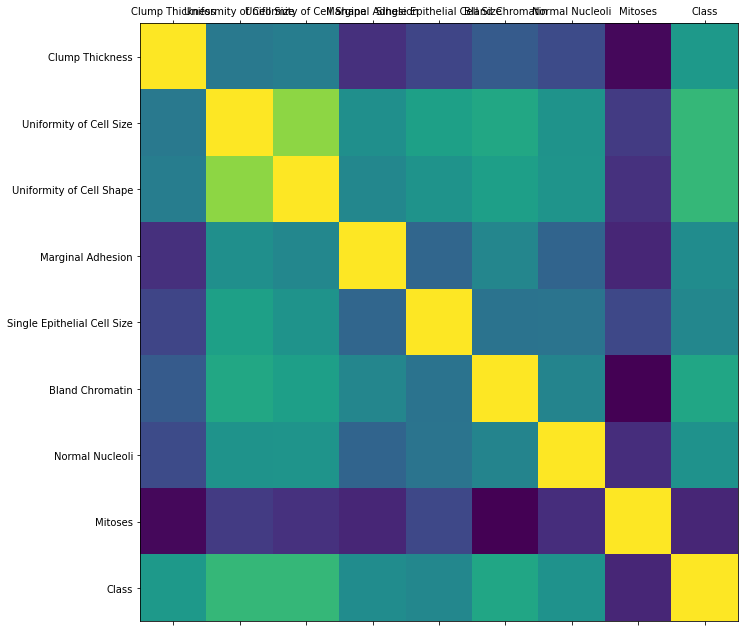

In [2306]:
plot_corr(df)

In [2307]:
df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.570750,0.584082,0.379143,0.429917,0.485863,0.444267,0.294359,0.670230
Uniformity of Cell Size,0.570750,1.000000,0.876916,0.638499,0.689472,0.710705,0.650262,0.403411,0.758697
Uniformity of Cell Shape,0.584082,0.876916,1.000000,0.612859,0.650156,0.684466,0.650739,0.381447,0.759500
Marginal Adhesion,0.379143,0.638499,0.612859,1.000000,0.517930,0.610571,0.510035,0.356659,0.630415
Single Epithelial Cell Size,0.429917,0.689472,0.650156,0.517930,1.000000,0.554047,0.555774,0.434059,0.611432
Bland Chromatin,0.485863,0.710705,0.684466,0.610571,0.554047,1.000000,0.604527,0.278639,0.706738
Normal Nucleoli,0.444267,0.650262,0.650739,0.510035,0.555774,0.604527,1.000000,0.373095,0.645257
Mitoses,0.294359,0.403411,0.381447,0.356659,0.434059,0.278639,0.373095,1.000000,0.357184
Class,0.670230,0.758697,0.759500,0.630415,0.611432,0.706738,0.645257,0.357184,1.000000


## Data Transformation

### Change data type of Bare Nuclei

In [2308]:
### Change data type of Bare Nuclei feature to int64
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              449 non-null    int64 
 1   Uniformity of Cell Size      449 non-null    int64 
 2   Uniformity of Cell Shape     449 non-null    int64 
 3   Marginal Adhesion            449 non-null    int64 
 4   Single Epithelial Cell Size  449 non-null    int64 
 5   Bare Nuclei                  449 non-null    object
 6   Bland Chromatin              449 non-null    int64 
 7   Normal Nucleoli              449 non-null    int64 
 8   Mitoses                      449 non-null    int64 
 9   Class                        449 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 38.6+ KB


In [2309]:
# This fails because of a known bug: TypeError: object cannot be converted to an IntegerDtype
#df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')
# first convert to float before int
df['Bare Nuclei'] = df['Bare Nuclei'].astype('float')  
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [2310]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              449 non-null    int64
 1   Uniformity of Cell Size      449 non-null    int64
 2   Uniformity of Cell Shape     449 non-null    int64
 3   Marginal Adhesion            449 non-null    int64
 4   Single Epithelial Cell Size  449 non-null    int64
 5   Bare Nuclei                  449 non-null    int64
 6   Bland Chromatin              449 non-null    int64
 7   Normal Nucleoli              449 non-null    int64
 8   Mitoses                      449 non-null    int64
 9   Class                        449 non-null    int64
dtypes: int64(10)
memory usage: 38.6 KB


### Convert dependant variable into boolean (2 for benign, 4 for malignant) to 0 - bening, 1-malignant

In [2311]:
cancer_map = {2: 0, 4: 1}

In [2312]:
df['Class'] = df['Class'].map(cancer_map)

In [2313]:
df.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


### Check bening/malignant ratio

In [2314]:
num_bening = len(df.loc[df['Class'] == False])
num_malingnant = len(df.loc[df['Class'] == True])
print("Number of bening cases {0} ({1:2.2f} %)".format(num_bening, (num_bening/(num_bening+num_malingnant))*100))
print("Number of malingnant cases {0} ({1:2.2f}%)".format(num_malingnant, (num_malingnant/(num_bening+num_malingnant))*100))

Number of bening cases 213 (47.44 %)
Number of malingnant cases 236 (52.56%)


# Visualize data

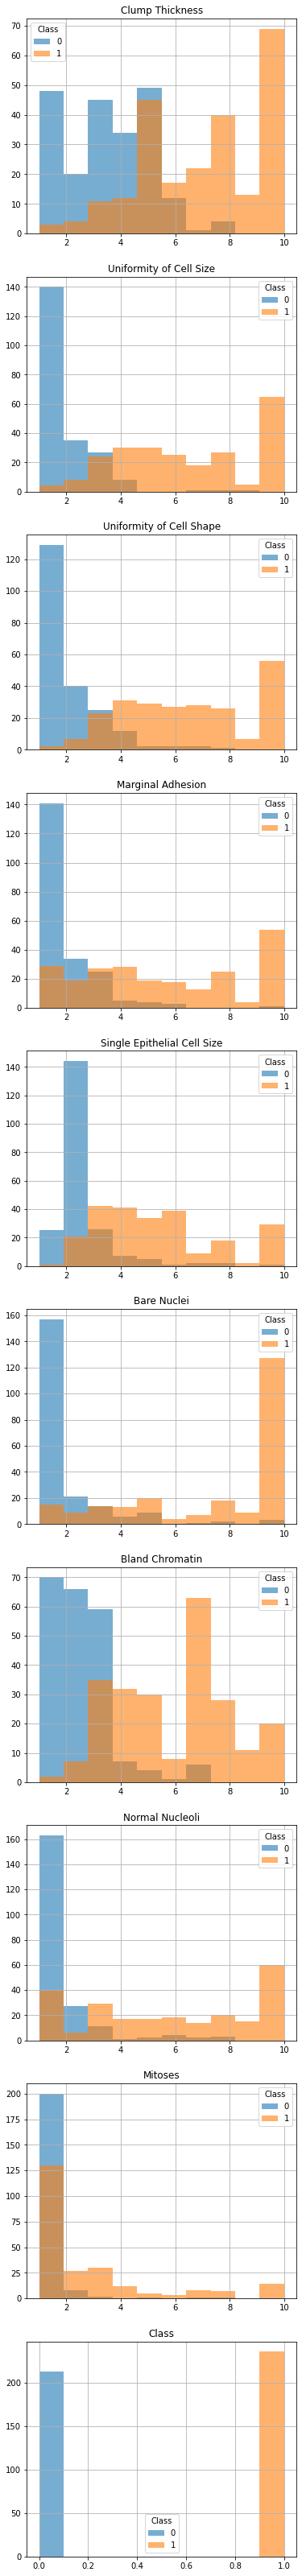

In [2315]:
# Generate histograms for all features

fig, axs = plt.subplots(len(df.columns), figsize=(6,58))
for n, col in enumerate(df.columns):
    axes = df.groupby("Class")[col].hist(ax=axs[n], alpha=0.6,range=[df[col].min(),df[col].max()], legend=True)
    for i, ax in enumerate(axes.ravel(), start=1):
        if i <= 11:
            ax.set_title(f'{col}')
            ax.legend(title='Class')
plt.show()


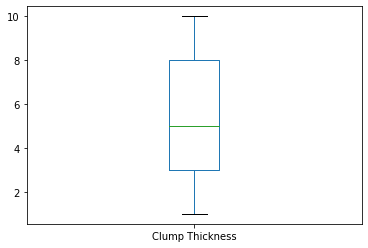

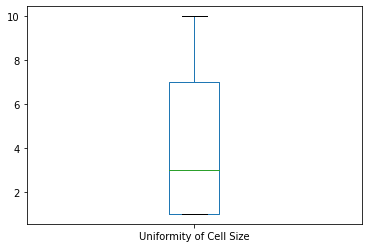

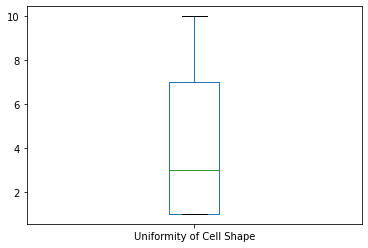

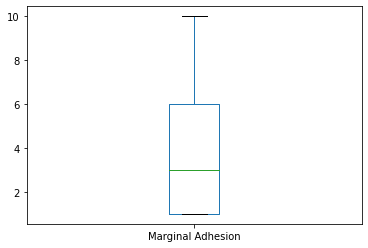

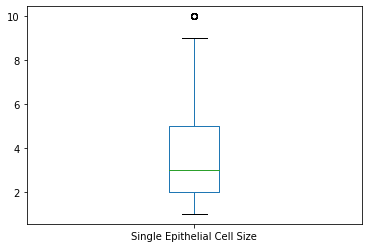

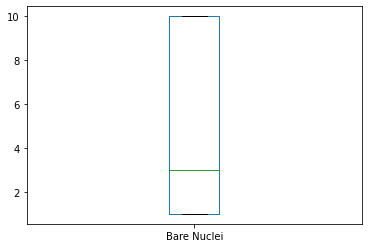

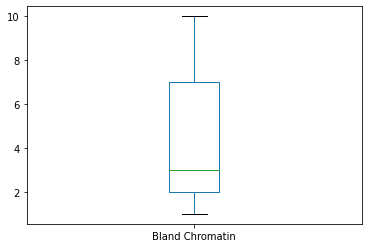

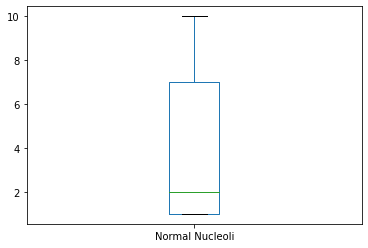

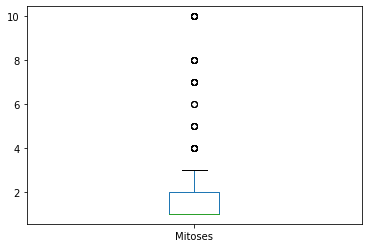

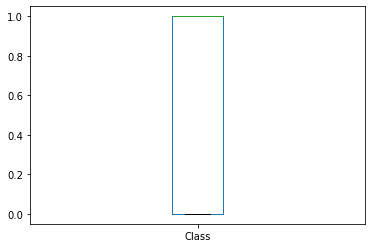

In [2316]:
# Generate a whiskers boxplot for one of the attributes (Uniformity of Cell Size)
for n, col in enumerate(df.columns):
    df[col].plot(kind='box')
    plt.show()

## Applying datamining techniques

### Splitting the data

In [2317]:
featureColNames = ['Clump Thickness', 'Uniformity of Cell Size', 
                   'Uniformity of Cell Shape', 'Marginal Adhesion', 
                   'Single Epithelial Cell Size', 'Bare Nuclei', 
                   'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
predictedClassName = ['Class']

X = df[featureColNames].values
Y = df[predictedClassName].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)


In [2318]:
# Ensure we have the right percentage, not only of values, but also, the right percentage of bening and malignant values

print("==== TOTAL DATA ====")
print("Percentage of training {0} ({1:0.2f} %)".format(len(X_train), (len(X_train)/len(df.index))*100))
print("Percentage of testing {0} ({1:0.2f} %)".format(len(X_test), (len(X_test)/len(df.index))*100))
print("==== PERCENTAGE OF BENIGN AND MALIGNANT CASES IN THE ENTIRE DATASET ====")
print("Number of bening cases {0} ({1:2.2f} %)".format(num_bening, (num_bening/(num_bening+num_malingnant))*100))
print("Number of malingnant cases {0} ({1:2.2f}%)".format(num_malingnant, (num_malingnant/(num_bening+num_malingnant))*100))
print("==== PERCENTAGE OF BENIGN AND MALIGNANT CASES IN THE TRAINING SECTION OF THE DATASET ====")
print("Number of bening cases {0} ({1:2.2f} %)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)*100)))
print("Number of malingnant cases {0} ({1:2.2f} %)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)*100)))
print("==== PERCENTAGE OF BENIGN AND MALIGNANT CASES IN THE TESTING SECTION OF THE DATASET ====")
print("Number of bening cases {0} ({1:2.2f} %)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)*100)))
print("Number of malingnant cases {0} ({1:2.2f} %)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)*100)))




==== TOTAL DATA ====
Percentage of training 314 (69.93 %)
Percentage of testing 135 (30.07 %)
==== PERCENTAGE OF BENIGN AND MALIGNANT CASES IN THE ENTIRE DATASET ====
Number of bening cases 213 (47.44 %)
Number of malingnant cases 236 (52.56%)
==== PERCENTAGE OF BENIGN AND MALIGNANT CASES IN THE TRAINING SECTION OF THE DATASET ====
Number of bening cases 153 (48.73 %)
Number of malingnant cases 161 (51.27 %)
==== PERCENTAGE OF BENIGN AND MALIGNANT CASES IN THE TESTING SECTION OF THE DATASET ====
Number of bening cases 60 (44.44 %)
Number of malingnant cases 75 (55.56 %)


### Support Vector Machine (SVM)

In [2319]:
# Generate the model and apply it on the train data
svmModel = svm.SVC()
svmModel.fit(X_train, Y_train.ravel())

# Performance on train and test data
svmPredictTrain = svmModel.predict(X_train)
svmPredictTest = svmModel.predict(X_test)
print("Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(Y_train, svmPredictTrain)))
print("Accuracy with Testing Data: {0:.4f}".format(metrics.accuracy_score(Y_test, svmPredictTest)))
print("")

# Metrics
print("Confusion Matrix:");
print("{0}".format(metrics.confusion_matrix(Y_test, grid_predictions)))
print("")
print("Classification report")
print(metrics.classification_report(Y_test, svmPredictTest))

Accuracy with Training Data: 0.9745
Accuracy with Testing Data: 0.9259

Confusion Matrix:
[[57  3]
 [ 6 69]]

Classification report
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        60
           1       0.92      0.95      0.93        75

    accuracy                           0.93       135
   macro avg       0.93      0.92      0.92       135
weighted avg       0.93      0.93      0.93       135



#### Support Vector Machine (SVM) With K-fold cross validation

TRAINING DATA WITH K-FOLD = 10
Best score 96.50%
Best parameters  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator  SVC(C=1, gamma=0.01)

TESTING DATA
Accuracy: 92.59%
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        60
           1       0.92      0.95      0.93        75

    accuracy                           0.93       135
   macro avg       0.93      0.92      0.92       135
weighted avg       0.93      0.93      0.93       135

Area Under the ROC Curve 0.9657777777777778
Precision 0.92
Recall 0.95
Specificity 0.90
F-Measure 0.93


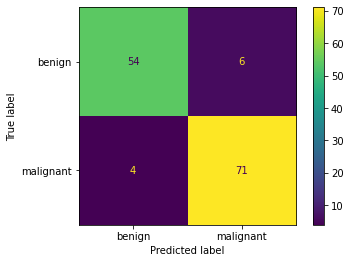

In [2320]:
kfold_number = 10;
model_Hiperparameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm.SVC(), model_Hiperparameters, refit = True, cv=kfold_number)

# fitting the model for grid search
grid.fit(X_train, Y_train.ravel())

# print best score and parameter after tuning for TRAINING DATA
print("TRAINING DATA WITH K-FOLD = {0}".format(kfold_number));

print("Best score {0:.2f}%".format(grid.best_score_*100))
print("Best parameters ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator ", grid.best_estimator_)

# Perform prediction with TESTING DATA with best estimator
grid_predictions = grid.predict(X_test)
 
# print classification report
print("");
print("TESTING DATA");
print("Accuracy: {0:.2f}%".format(metrics.accuracy_score(Y_test, grid_predictions)*100))
labels = ['benign', 'malignant']
cm = metrics.confusion_matrix(Y_test, grid_predictions)
metrics.ConfusionMatrixDisplay(cm, display_labels=labels).plot()
print(metrics.classification_report(Y_test, grid_predictions))

print("Area Under the ROC Curve {}".format(roc_auc_score(Y_test, grid.decision_function(X_test))))

# Precision, Recall, Specificity, F-Measure
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, grid_predictions).ravel()
precision = tp/(tp+fp);
recall = tp/(tp+fn);
specificity = tn/(tn+fp);
fMeasure = (2*precision*recall)/(precision+recall);
print("Precision {0:.2f}".format(precision));
print("Recall {0:.2f}".format(recall));
print("Specificity {0:.2f}".format(specificity));
print("F-Measure {0:.2f}".format(fMeasure));




### Naive Bayes

In [2321]:
# Create Gaussian Naive Bayes object model and train it with the data
nbModel = GaussianNB();
nbModel.fit(X_train, Y_train.ravel())

# Performance on train and test data
nbPredictTrain = nbModel.predict(X_train)
nbPredictTest = nbModel.predict(X_test)
print("Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(Y_train, nbPredictTrain)))
print("Accuracy with Testing Data: {0:.4f}".format(metrics.accuracy_score(Y_test, nbPredictTest)))
print("")

# Metrics
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(Y_test, nbPredictTest)))
print("")
print("Classification report")
print(metrics.classification_report(Y_test, nbPredictTest))

Accuracy with Training Data: 0.9618
Accuracy with Testing Data: 0.9111

Confusion matrix
[[53  7]
 [ 5 70]]

Classification report
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        60
           1       0.91      0.93      0.92        75

    accuracy                           0.91       135
   macro avg       0.91      0.91      0.91       135
weighted avg       0.91      0.91      0.91       135



#### Naive Bayes With K-Fold cross validation

TRAINING DATA WITH K-FOLD = 10
Best score 96.50%
Best parameters  {'var_smoothing': 0.1873817422860384}
Best estimator  GaussianNB(var_smoothing=0.1873817422860384)

TESTING DATA
Accuracy: 91.11%
Confusion Matrix:
[[56  4]
 [ 8 67]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        60
           1       0.94      0.89      0.92        75

    accuracy                           0.91       135
   macro avg       0.91      0.91      0.91       135
weighted avg       0.91      0.91      0.91       135

Area Under the ROC Curve 0.9802222222222222
Precision 0.94
Recall 0.89
Specificity 0.93
F-Measure 0.92


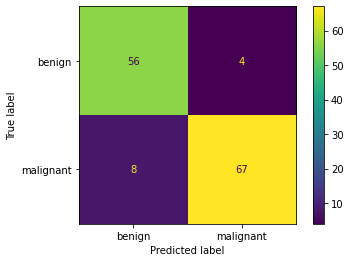

In [2322]:
kfold_number = 10;
model_Hiperparameters = {'var_smoothing': np.logspace(0,-9, num=100)}
nbModel = GaussianNB()
 
grid = GridSearchCV(nbModel, model_Hiperparameters, refit = True, cv=kfold_number)

# fitting the model for grid search
grid.fit(X_train, Y_train.ravel())

# print best score and parameter after tuning for TRAINING DATA
print("TRAINING DATA WITH K-FOLD = {0}".format(kfold_number));
print("Best score {0:.2f}%".format(grid.best_score_*100))
print("Best parameters ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator ", grid.best_estimator_)

# Perform prediction with TESTING DATA with best estimator
grid_predictions = grid.predict(X_test)
 
# print classification report
print("");
print("TESTING DATA");
print("Accuracy: {0:.2f}%".format(metrics.accuracy_score(Y_test, grid_predictions)*100))
print("Confusion Matrix:");
print("{0}".format(metrics.confusion_matrix(Y_test, grid_predictions)))
labels = ['benign', 'malignant']
cm = metrics.confusion_matrix(Y_test, grid_predictions)
metrics.ConfusionMatrixDisplay(cm, display_labels=labels).plot()
print(metrics.classification_report(Y_test, grid_predictions))

#print("Area Under the ROC Curve {}".format(roc_auc_score(Y_test, grid.decision_function(X_test))))
print("Area Under the ROC Curve {}".format(roc_auc_score(Y_test, grid.predict_proba(X_test)[:, 1])))


# Precision, Recall, Specificity, F-Measure
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, grid_predictions).ravel()
precision = tp/(tp+fp);
recall = tp/(tp+fn);
specificity = tn/(tn+fp);
fMeasure = (2*precision*recall)/(precision+recall);
print("Precision {0:.2f}".format(precision));
print("Recall {0:.2f}".format(recall));
print("Specificity {0:.2f}".format(specificity));
print("F-Measure {0:.2f}".format(fMeasure));



### Random Forest

In [2323]:
# Generate the model and apply it on the train data
rfModel = RandomForestClassifier();
rfModel.fit(X_train, Y_train.ravel())

# Performance on train and test data
rfPredictTrain = rfModel.predict(X_train)
rfPredictTest = rfModel.predict(X_test)
print("Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(Y_train, rfPredictTrain)))
print("Accuracy with Testing Data: {0:.4f}".format(metrics.accuracy_score(Y_test, rfPredictTest)))
print("")

# Metrics
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(Y_test, rfPredictTest)))
print("")
print("Classification report")
print(metrics.classification_report(Y_test, rfPredictTest))

Accuracy with Training Data: 1.0000
Accuracy with Testing Data: 0.9407

Confusion matrix
[[55  5]
 [ 3 72]]

Classification report
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        60
           1       0.94      0.96      0.95        75

    accuracy                           0.94       135
   macro avg       0.94      0.94      0.94       135
weighted avg       0.94      0.94      0.94       135



With k-fold cross validation

TRAINING DATA WITH K-FOLD = 10
Best score 97.45%
Best parameters  {'max_features': 'auto', 'n_estimators': 700, 'oob_score': True}
Best estimator  RandomForestClassifier(n_estimators=700, n_jobs=-1, oob_score=True)

TESTING DATA
Accuracy: 94.81%
Confusion Matrix:
[[56  4]
 [ 3 72]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        60
           1       0.95      0.96      0.95        75

    accuracy                           0.95       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135

Area Under the ROC Curve 0.9748888888888889
Precision 0.95
Recall 0.96
Specificity 0.93
F-Measure 0.95


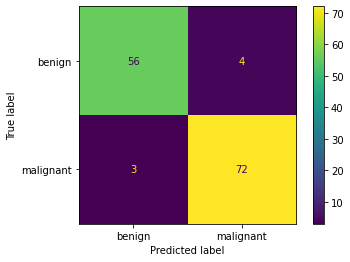

In [2324]:
rfc = RandomForestClassifier(n_jobs=-1) 

model_Hiperparameters = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'oob_score': [True, False]
}

kfold_number = 10;
 
grid = GridSearchCV(rfc, model_Hiperparameters, refit = True, cv=kfold_number)

# fitting the model for grid search
grid.fit(X_train, Y_train.ravel())

# print best score and parameter after tuning for TRAINING DATA
print("TRAINING DATA WITH K-FOLD = {0}".format(kfold_number));
print("Best score {0:.2f}%".format(grid.best_score_*100))
print("Best parameters ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator ", grid.best_estimator_)

# Perform prediction with TESTING DATA with best estimator
grid_predictions = grid.predict(X_test)
 
# print classification report
print("");
print("TESTING DATA");
print("Accuracy: {0:.2f}%".format(metrics.accuracy_score(Y_test, grid_predictions)*100))
print("Confusion Matrix:");
print("{0}".format(metrics.confusion_matrix(Y_test, grid_predictions)))
labels = ['benign', 'malignant']
cm = metrics.confusion_matrix(Y_test, grid_predictions)
metrics.ConfusionMatrixDisplay(cm, display_labels=labels).plot()
print(metrics.classification_report(Y_test, grid_predictions))

print("Area Under the ROC Curve {}".format(roc_auc_score(Y_test, grid.predict_proba(X_test)[:, 1])))

# Precision, Recall, Specificity, F-Measure
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, grid_predictions).ravel()
precision = tp/(tp+fp);
recall = tp/(tp+fn);
specificity = tn/(tn+fp);
fMeasure = (2*precision*recall)/(precision+recall);
print("Precision {0:.2f}".format(precision));
print("Recall {0:.2f}".format(recall));
print("Specificity {0:.2f}".format(specificity));
print("F-Measure {0:.2f}".format(fMeasure));


### Logistic reggression


In [2325]:
# Generate the model and apply it on the train data
lrModel = LogisticRegression(C=0.7);
lrModel.fit(X_train, Y_train.ravel())

# Performance on train and test data
lrPredictTrain = lrModel.predict(X_train)
lrPredictTest = lrModel.predict(X_test)
print("Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(Y_train, lrPredictTrain)))
print("Accuracy with Testing Data: {0:.4f}".format(metrics.accuracy_score(Y_test, lrPredictTest)))
print("")

# Metrics
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(Y_test, lrPredictTest)))
print("")
print("Classification report")
print(metrics.classification_report(Y_test, lrPredictTest))

Accuracy with Training Data: 0.9682
Accuracy with Testing Data: 0.9333

Confusion matrix
[[55  5]
 [ 4 71]]

Classification report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        60
           1       0.93      0.95      0.94        75

    accuracy                           0.93       135
   macro avg       0.93      0.93      0.93       135
weighted avg       0.93      0.93      0.93       135



With k-fold cross validation

Accuracy with Training Data: 96.82%

TESTING DATA
Accuracy: 94.81%

Confusion matrix
[[56  4]
 [ 7 68]]

Classification report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        60
           1       0.94      0.91      0.93        75

    accuracy                           0.92       135
   macro avg       0.92      0.92      0.92       135
weighted avg       0.92      0.92      0.92       135

Area Under the ROC Curve 0.9800000000000001
Precision 0.94
Recall 0.91
Specificity 0.93
F-Measure 0.93


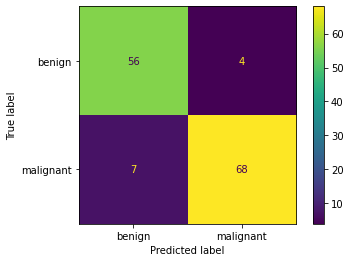

In [2326]:
kfold_number = 10;

# Generate the model and apply it on the train data
lrcvModel = LogisticRegressionCV(n_jobs=-1, cv=kfold_number, Cs=5, class_weight="balanced", refit=False);
lrcvModel.fit(X_train, Y_train.ravel())

# Performance on train and test data
lrcvPredictTrain = lrcvModel.predict(X_train)
lrcvPredictTest = lrcvModel.predict(X_test)
print("Accuracy with Training Data: {0:.2f}%".format(metrics.accuracy_score(Y_train, lrcvPredictTrain)*100))

# Metrics
print("");
print("TESTING DATA");
print("Accuracy: {0:.2f}%".format(metrics.accuracy_score(Y_test, grid_predictions)*100))
print("")
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(Y_test, lrcvPredictTest)))
print("")
labels = ['benign', 'malignant']
cm = metrics.confusion_matrix(Y_test, lrcvPredictTest)
metrics.ConfusionMatrixDisplay(cm, display_labels=labels).plot()
print("Classification report")
print(metrics.classification_report(Y_test, lrcvPredictTest))

print("Area Under the ROC Curve {}".format(roc_auc_score(Y_test, lrcvModel.decision_function(X_test))))

# Precision, Recall, Specificity, F-Measure
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, lrcvPredictTest).ravel()
precision = tp/(tp+fp);
recall = tp/(tp+fn);
specificity = tn/(tn+fp);
fMeasure = (2*precision*recall)/(precision+recall);
print("Precision {0:.2f}".format(precision));
print("Recall {0:.2f}".format(recall));
print("Specificity {0:.2f}".format(specificity));
print("F-Measure {0:.2f}".format(fMeasure));


### Decision Tree Classifier

In [2327]:
# Generate the model and apply it on the train data
dtModel = DecisionTreeClassifier()
dtModel.fit(X_train, Y_train.ravel())

# Performance on train and test data
dtPredictTrain = dtModel.predict(X_train)
dtPredictTest = dtModel.predict(X_test)
print("Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(Y_train, dtPredictTrain)))
print("Accuracy with Testing Data: {0:.4f}".format(metrics.accuracy_score(Y_test, dtPredictTest)))
print("")

# Metrics
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(Y_test, dtPredictTest)))
print("")
print("Classification report")
print(metrics.classification_report(Y_test, dtPredictTest))

Accuracy with Training Data: 1.0000
Accuracy with Testing Data: 0.8815

Confusion matrix
[[52  8]
 [ 8 67]]

Classification report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        60
           1       0.89      0.89      0.89        75

    accuracy                           0.88       135
   macro avg       0.88      0.88      0.88       135
weighted avg       0.88      0.88      0.88       135



#### Decision Tree Classifier With k-fold cross validation

TRAINING DATA WITH K-FOLD = 10
Best score 95.85%
Best parameters  {'criterion': 'entropy', 'max_depth': 4}
Best estimator  DecisionTreeClassifier(criterion='entropy', max_depth=4)

TESTING DATA
Accuracy: 86.67%
Confusion Matrix:
[[51  9]
 [ 9 66]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        60
           1       0.88      0.88      0.88        75

    accuracy                           0.87       135
   macro avg       0.86      0.86      0.86       135
weighted avg       0.87      0.87      0.87       135

Area Under the ROC Curve 0.8989999999999999
Precision 0.88
Recall 0.88
Specificity 0.85
F-Measure 0.88


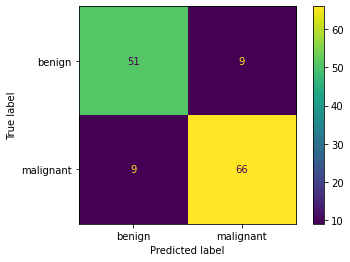

In [2328]:
rfc = DecisionTreeClassifier() 

model_Hiperparameters = {
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3, 15)
}

kfold_number = 10;
 
grid = GridSearchCV(rfc, model_Hiperparameters, refit = True, cv=kfold_number)

# fitting the model for grid search
grid.fit(X_train, Y_train.ravel())

# print best score and parameter after tuning for TRAINING DATA
print("TRAINING DATA WITH K-FOLD = {0}".format(kfold_number));
print("Best score {0:.2f}%".format(grid.best_score_*100))
print("Best parameters ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator ", grid.best_estimator_)

# Perform prediction with TESTING DATA with best estimator
grid_predictions = grid.predict(X_test)
 
# print classification report
print("");
print("TESTING DATA");
print("Accuracy: {0:.2f}%".format(metrics.accuracy_score(Y_test, grid_predictions)*100))
print("Confusion Matrix:");
print("{0}".format(metrics.confusion_matrix(Y_test, grid_predictions)))
labels = ['benign', 'malignant']
cm = metrics.confusion_matrix(Y_test, grid_predictions)
metrics.ConfusionMatrixDisplay(cm, display_labels=labels).plot()
print(metrics.classification_report(Y_test, grid_predictions))

#print("Area Under the ROC Curve {}".format(roc_auc_score(Y_test, grid.decision_function(X_test))))
print("Area Under the ROC Curve {}".format(roc_auc_score(Y_test, grid.predict_proba(X_test)[:, 1])))

# Precision, Recall, Specificity, F-Measure
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, grid_predictions).ravel()
precision = tp/(tp+fp);
recall = tp/(tp+fn);
specificity = tn/(tn+fp);
fMeasure = (2*precision*recall)/(precision+recall);
print("Precision {0:.2f}".format(precision));
print("Recall {0:.2f}".format(recall));
print("Specificity {0:.2f}".format(specificity));
print("F-Measure {0:.2f}".format(fMeasure));



### k-Nearest-Neighbors (k-NN)

In [2329]:
# Create KNN classifier
knnModel = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knnModel.fit(X_train, Y_train.ravel())


# Performance on train and test data
knnPredictTrain = knnModel.predict(X_train)
knnPredictTest = knnModel.predict(X_test)
print("Accuracy with Training Data: {0:.4f}".format(metrics.accuracy_score(Y_train, knnPredictTrain)))
print("Accuracy with Testing Data: {0:.4f}".format(metrics.accuracy_score(Y_test, knnPredictTest)))
print("")

# Metrics
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(Y_test, knnPredictTest)))
print("")
print("Classification report")
print(metrics.classification_report(Y_test, knnPredictTest))

Accuracy with Training Data: 0.9777
Accuracy with Testing Data: 0.9333

Confusion matrix
[[57  3]
 [ 6 69]]

Classification report
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        60
           1       0.96      0.92      0.94        75

    accuracy                           0.93       135
   macro avg       0.93      0.94      0.93       135
weighted avg       0.93      0.93      0.93       135



#### k-Nearest-Neighbors (k-NN) With k-fold cross validation

TRAINING DATA WITH K-FOLD = 10
Best score 96.50%
Best parameters  {'n_neighbors': 3}
Best estimator  KNeighborsClassifier(n_neighbors=3)

TESTING DATA
Accuracy: 93.33%
Confusion Matrix:
[[57  3]
 [ 6 69]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        60
           1       0.96      0.92      0.94        75

    accuracy                           0.93       135
   macro avg       0.93      0.94      0.93       135
weighted avg       0.93      0.93      0.93       135

Area Under the ROC Curve 0.9653333333333334
Precision 0.96
Recall 0.92
Specificity 0.95
F-Measure 0.94


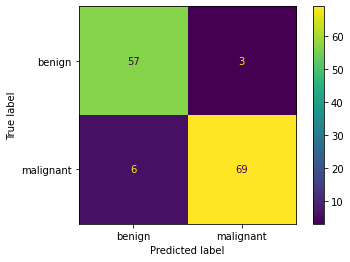

In [2330]:
classifier = KNeighborsClassifier() 

model_Hiperparameters = {
    'n_neighbors': np.arange(1, 25)
}

kfold_number = 10;
 
grid = GridSearchCV(classifier, model_Hiperparameters, refit = True, cv=kfold_number)

# fitting the model for grid search
grid.fit(X_train, Y_train.ravel())

# print best score and parameter after tuning for TRAINING DATA
print("TRAINING DATA WITH K-FOLD = {0}".format(kfold_number));
print("Best score {0:.2f}%".format(grid.best_score_*100))
print("Best parameters ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator ", grid.best_estimator_)

# Perform prediction with TESTING DATA with best estimator
grid_predictions = grid.predict(X_test)
 
# print classification report
print("");
print("TESTING DATA");
print("Accuracy: {0:.2f}%".format(metrics.accuracy_score(Y_test, grid_predictions)*100))
print("Confusion Matrix:");
print("{0}".format(metrics.confusion_matrix(Y_test, grid_predictions)))
labels = ['benign', 'malignant']
cm = metrics.confusion_matrix(Y_test, grid_predictions)
metrics.ConfusionMatrixDisplay(cm, display_labels=labels).plot()
print(metrics.classification_report(Y_test, grid_predictions))

#print("Area Under the ROC Curve {}".format(roc_auc_score(Y_test, grid.decision_function(X_test))))
print("Area Under the ROC Curve {}".format(roc_auc_score(Y_test, grid.predict_proba(X_test)[:, 1])))

# Precision, Recall, Specificity, F-Measure
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, grid_predictions).ravel()
precision = tp/(tp+fp);
recall = tp/(tp+fn);
specificity = tn/(tn+fp);
fMeasure = (2*precision*recall)/(precision+recall);
print("Precision {0:.2f}".format(precision));
print("Recall {0:.2f}".format(recall));
print("Specificity {0:.2f}".format(specificity));
print("F-Measure {0:.2f}".format(fMeasure));




### K-Means

Accuracy with Training Data: 93.95%
Accuracy with Testing Data: 89.63%

Confusion matrix
[[58  2]
 [12 63]]

Classification report
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        60
           1       0.97      0.84      0.90        75

    accuracy                           0.90       135
   macro avg       0.90      0.90      0.90       135
weighted avg       0.91      0.90      0.90       135

Precision 0.97
Recall 0.84
Specificity 0.97
F-Measure 0.90


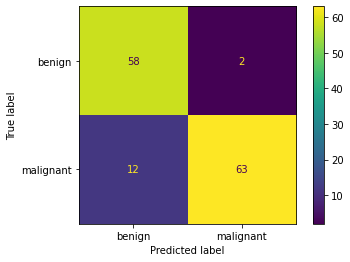

In [2331]:
# Create KNN classifier
kmModel = KMeans(n_clusters=2)
# Fit the classifier to the data
kmModel.fit(X_train, Y_train.ravel())


# Performance on train and test data
kmPredictTrain = kmModel.predict(X_train)
kmPredictTest = kmModel.predict(X_test)
print("Accuracy with Training Data: {0:.2f}%".format(metrics.accuracy_score(Y_train, kmPredictTrain)*100))
print("Accuracy with Testing Data: {0:.2f}%".format(metrics.accuracy_score(Y_test, kmPredictTest)*100))
print("")

# Metrics
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(Y_test, kmPredictTest)))
labels = ['benign', 'malignant']
cm = metrics.confusion_matrix(Y_test, kmPredictTest)
metrics.ConfusionMatrixDisplay(cm, display_labels=labels).plot()
print("")
print("Classification report")
print(metrics.classification_report(Y_test, kmPredictTest))

# Precision, Recall, Specificity, F-Measure
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, kmPredictTest).ravel()
precision = tp/(tp+fp);
recall = tp/(tp+fn);
specificity = tn/(tn+fp);
fMeasure = (2*precision*recall)/(precision+recall);
print("Precision {0:.2f}".format(precision));
print("Recall {0:.2f}".format(recall));
print("Specificity {0:.2f}".format(specificity));
print("F-Measure {0:.2f}".format(fMeasure));




